In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [2]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

qr = QuantumRegister(4, "qr")
cr = ClassicalRegister(4, 'cr')
circuit = QuantumCircuit(qr, cr, name="initializer_circ")

desired_vector = [
    1 / math.sqrt(4) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(0, 1),
    0,
    0,
    0,
    0,
    1 / math.sqrt(4) * complex(1, 0),
    1 / math.sqrt(8) * complex(1, 0)]

circuit.initialize(desired_vector, [qr[0], qr[1], qr[2], qr[3]])

circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])
circuit.measure(qr[2], cr[2])
circuit.measure(qr[3], cr[3])

circuit.draw()



<Figure size 1086.94x693.972 with 1 Axes>

In [3]:
###############################################################
# Execute on a simulator backend.
###############################################################
shots = 10000

# Desired vector
print("Desired probabilities: ")
print(str(list(map(lambda x: format(abs(x * x), '.3f'), desired_vector))))

# Initialize on local simulator
sim_backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, sim_backend, shots=shots)
result = job.result()

n_qubits_qureg = qr.size
counts = result.get_counts(circuit)

qubit_strings = [format(i, '0%sb' % n_qubits_qureg) for
                 i in range(2 ** n_qubits_qureg)]
print("Probabilities from simulator: ")
print([format(counts.get(s, 0) / shots, '.3f') for
       s in qubit_strings])

Desired probabilities: 
['0.250', '0.125', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.125', '0.125', '0.000', '0.000', '0.000', '0.000', '0.250', '0.125']
Probabilities from simulator: 
['0.256', '0.124', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.124', '0.132', '0.000', '0.000', '0.000', '0.000', '0.246', '0.118']


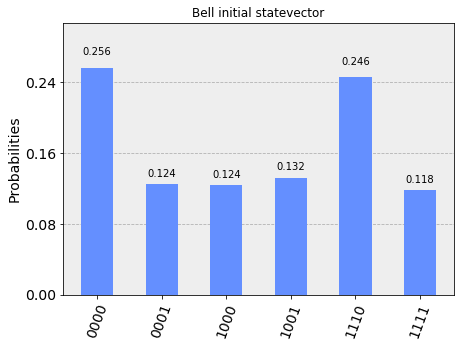

In [7]:

from qiskit.tools.visualization import plot_histogram

plot_histogram(counts, title="Bell initial statevector")
